In [1]:
%matplotlib inline
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad



## Problem 1

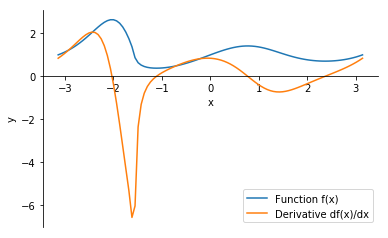

In [2]:
# Lets first create the function
x = symbols('x')
f = (sin(x)+1)**(sin(cos(x)))
# Now find the symbolic derivative
df_dx = diff(f)
# Lambdify f and df_dx
f_l = lambdify(x, f, 'numpy')
df_dx_l = lambdify(x, df_dx, 'numpy')

# Plot the function and it's derivative
x_grid = np.linspace(-np.pi, np.pi, 100)
y_f_grid = f_l(x_grid)
y_df_dx_grid = df_dx_l(x_grid)

plt.plot(x_grid, y_f_grid, label='Function f(x)')
plt.plot(x_grid, y_df_dx_grid, label='Derivative df(x)/dx')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 2

In [3]:
def finite_diff_quotients(f, x, h, Type, Order):
    """function that returns the finite difference quotients given
    in table 8.1"""
    if Type == 'Forward':
        if Order == 1:
            return (f(x+h)-f(x))/h
        elif Order == 2:
            return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
        else:
            print('Type and Order mismatch')
            return None
    elif Type == 'Backward':        
        if Order == 1:
            return (f(x)-f(x-h))/h
        elif Order == 2:
            return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
        else:
            print('Type and Order mismatch')
            return None
    elif Type == 'Centered':
        if Order == 2:
            return (f(x+h)-f(x-h))/(2*h)
        elif Order == 4:
            return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
        else:
            print('Type and Order mismatch')
            return None
    else:
        print('Type and Order mismatch')
        return None

In [4]:
# Get the values for a given h
def get_dict_of_values_for_h(x, h):
    types = ['Forward','Backward','Centered']
    order = [[1,2], [1,2], [2,4]]
    finite_diff_dict = {i:dict() for i in types}
    for i in range(len(types)):
        for j in order[i]:
            finite_diff_dict[types[i]][j] = finite_diff_quotients(f_l, x, h, types[i], j)
    return finite_diff_dict, types, order

def get_graph_p_2(x, h):
    # Plot the function and it's derivative
    finite_diff_dict, types, order = get_dict_of_values_for_h(x, h)
    fig, axes = plt.subplots(3, 2, sharey=True,figsize=(10, 14))

    for i in range(len(types)):
        for j in range(len(order[i])):
            axes[i, j].plot(x, y_f_grid, label='Function f(x)')
            axes[i, j].plot(x, y_df_dx_grid, label='Derivative df(x)/dx')
            axes[i, j].plot(x, finite_diff_dict[types[i]][order[i][j]], label='Derivative estimation')
            axes[i, j].spines['bottom'].set_position('zero')
            axes[i, j].spines['top'].set_visible(False)
            axes[i, j].spines['right'].set_visible(False)
            axes[i, j].set_title('Type: {}, Order: {}, h: {}'.format(types[i],order[i][j], h))
            axes[i, j].legend()
            axes[i, j].set_xlabel('x')
            axes[i, j].set_ylabel('y')


    plt.show()

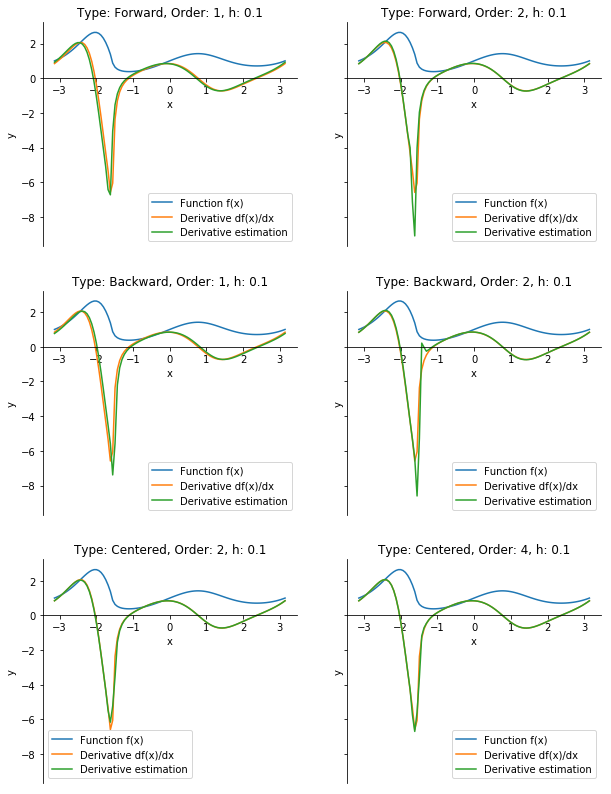

In [5]:
get_graph_p_2(x_grid, 0.1)

#### The results are quite accurate for lh of 0.1. From a visual analysis, it seems that centered type of order 4 has the least error.

## Problem 3

In [6]:
x_value = 1
h_value = np.logspace(-8, 0, 9)


true_value = df_dx_l(x_value)


types = ['Forward','Backward','Centered']
order = [[1,2], [1,2], [2,4]]
error_dict = {i:dict() for i in types}
for i in range(len(types)):
    for j in order[i]:
        error_dict[types[i]][j] = []

for i in range(h_value.shape[0]):
    finite_diff_dict, types, order = get_dict_of_values_for_h(1, h_value[i])
    for j in range(len(types)):
        for k in order[j]:
            error_dict[types[j]][k].append(abs(true_value - finite_diff_dict[types[j]][k]))



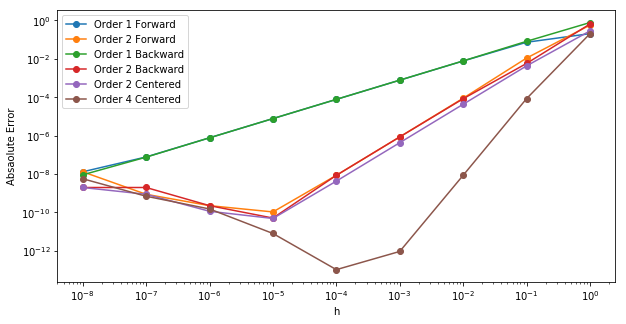

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

for i in range(len(types)):
    for j in order[i]:
        ax.plot(h_value, error_dict[types[i]][j], '-o',label='Order {} {}'.format(j, types[i]))

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('h')
ax.set_ylabel('Absaolute Error')
ax.legend()
plt.show()

## Problem 5

In [8]:
def get_centered_2(f, x, curr_basis, h):
    num = f(x+curr_basis*h)-f(x-curr_basis*h)
    denom = 2*h
    est = num/denom
    return est


def get_jacobian(f, x, h):
    jacobian = np.zeros((len(f), x.shape[0]))
    for i in range(len(f)):
        for j in range(x.shape[0]):
            curr_basis = np.eye((x.shape[0]),1,-j)
            jacobian[i,j] = get_centered_2(f[i], x, curr_basis, h)
    return jacobian

f_list = []
f_list.append(lambda x: x[0]**2)
f_list.append(lambda x: x[0]**3 - x[1])

get_jacobian(f_list, np.array([[10], [10]]), .1)        

array([[ 20.  ,   0.  ],
       [300.01,  -1.  ]])

## Problem 6

In [2]:

def cheb_poly_func(n, x):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*cheb_poly_func(n-1,x) - cheb_poly_func(n-2, x)

def cheb_poly_func_deriv(n, x):
    f_grid = cheb_poly_func(n, x)
    
    df_dx = elementwise_grad(cheb_poly_func, 1)
    df_dx_grid = df_dx(n, x) 
    
    return f_grid, df_dx_grid

In [3]:
x = anp.linspace(-1, 1, 100, dtype = anp.float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


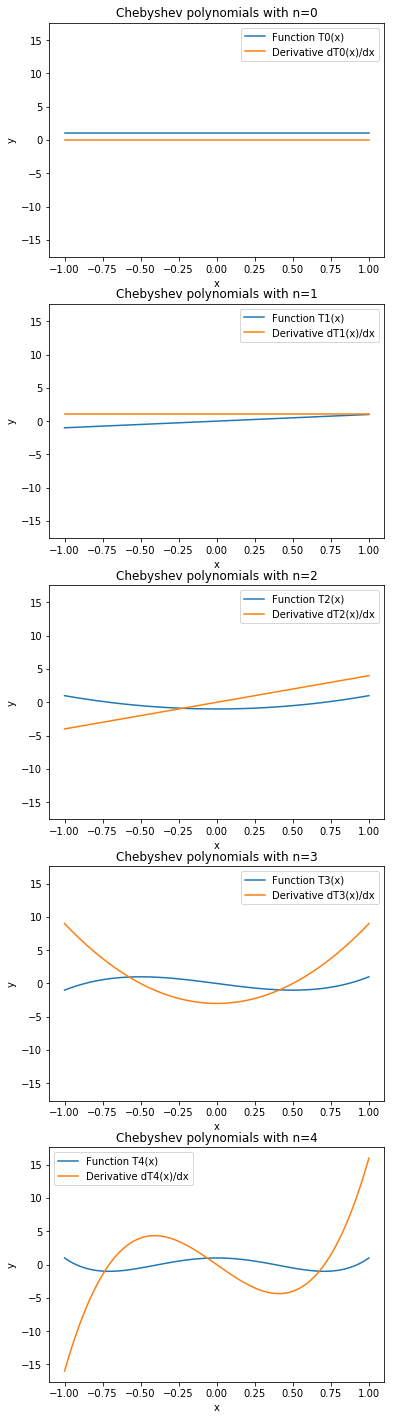

In [16]:
fig, axes = plt.subplots(5, 1, sharey=True,figsize=(6, 25))

for i in range(5):
    f_grid, df_dx_grid = cheb_poly_func_deriv(i,x)
    axes[i].plot(x, f_grid, label='Function T{}(x)'.format(i))
    axes[i].plot(x, df_dx_grid, label='Derivative dT{}(x)/dx'.format(i))
    axes[i].set_title('Chebyshev polynomials with n={}'.format(i))
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

plt.show()